In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/colab/Academic Folder/Data Mining/dummy_internship_data.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,Age,Gender,Education_Level,Internship_Duration,Paid_Internship,Mode,Job_Offer,Salary_Change,Skill_Improvement,Effectiveness
0,26,Male,Master,10,0,On-site,1,-72,4,0
1,23,Male,Master,2,1,On-site,1,1185,5,0
2,27,Female,Diploma,3,0,Hybrid,1,-85,4,0
3,24,Female,Master,11,1,Remote,1,976,1,0
4,26,Male,Master,1,1,Hybrid,0,226,1,1
...,...,...,...,...,...,...,...,...,...,...
995,29,Female,Bachelor,4,0,On-site,0,533,3,0
996,29,Female,Master,10,0,Hybrid,0,82,2,0
997,27,Male,Bachelor,3,1,Hybrid,0,613,2,0
998,21,Female,Bachelor,9,1,Hybrid,0,-275,1,0


In [ ]:
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   Age  Gender Education_Level  Internship_Duration  Paid_Internship     Mode  \
0   26    Male          Master                   10                0  On-site   
1   23    Male          Master                    2                1  On-site   
2   27  Female         Diploma                    3                0   Hybrid   
3   24  Female          Master                   11                1   Remote   
4   26    Male          Master                    1                1   Hybrid   

   Job_Offer  Salary_Change  Skill_Improvement  Effectiveness  
0          1            -72                  4              0  
1          1           1185                  5              0  
2          1            -85                  4              0  
3          1            976                  1              0  
4          0            226                  1              1  


In [ ]:
print("\nChecking for missing values...")
print(df.isnull().sum())


Checking for missing values...
Age                    0
Gender                 0
Education_Level        0
Internship_Duration    0
Paid_Internship        0
Mode                   0
Job_Offer              0
Salary_Change          0
Skill_Improvement      0
Effectiveness          0
dtype: int64


In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-8-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education_Level        0
Internship_Duration    0
Paid_Internship        0
Mode                   0
Job_Offer              0
Salary_Change          0
Skill_Improvement      0
Effectiveness          0
dtype: int64


In [ ]:
categorical_columns = ['Gender', 'Education_Level', 'Mode']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
X = df.drop(['Effectiveness'], axis=1)
y = df['Effectiveness']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5
F1 Score: 0.46236559139784944

Confusion Matrix:
[[57 49]
 [51 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.54      0.53       106
           1       0.47      0.46      0.46        94

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



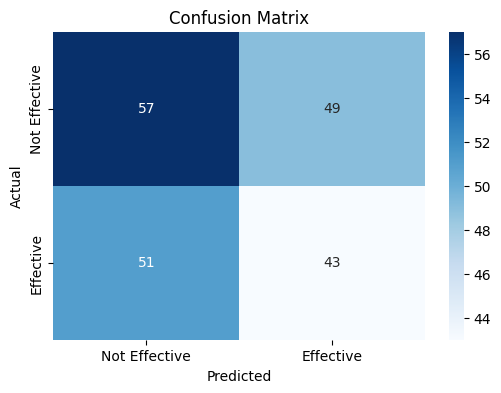

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Effective', 'Effective'], yticklabels=['Not Effective', 'Effective'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


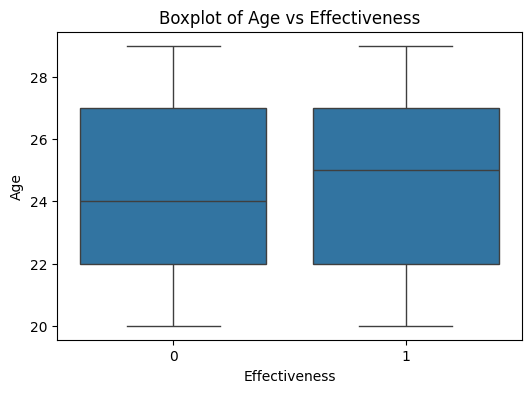

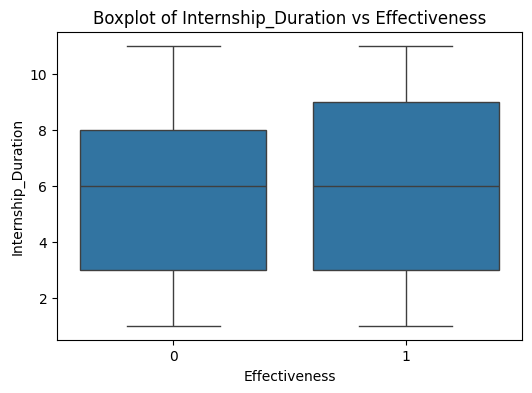

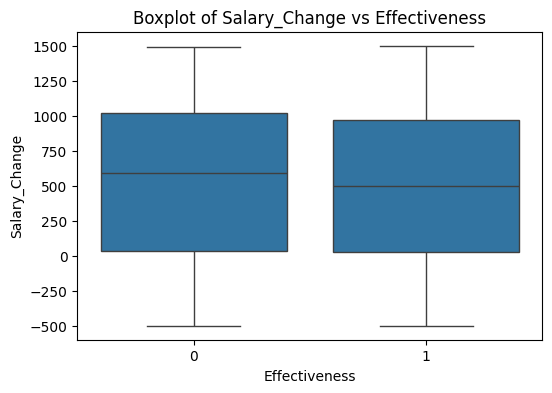

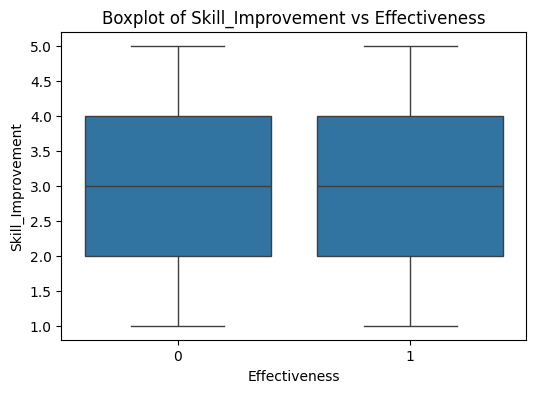

In [ ]:
numerical_columns = ['Age', 'Internship_Duration', 'Salary_Change', 'Skill_Improvement']  # Replace with your actual numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Effectiveness', y=col, data=df)
    plt.title(f'Boxplot of {col} vs Effectiveness')
    plt.xlabel('Effectiveness')
    plt.ylabel(col)
    plt.show()

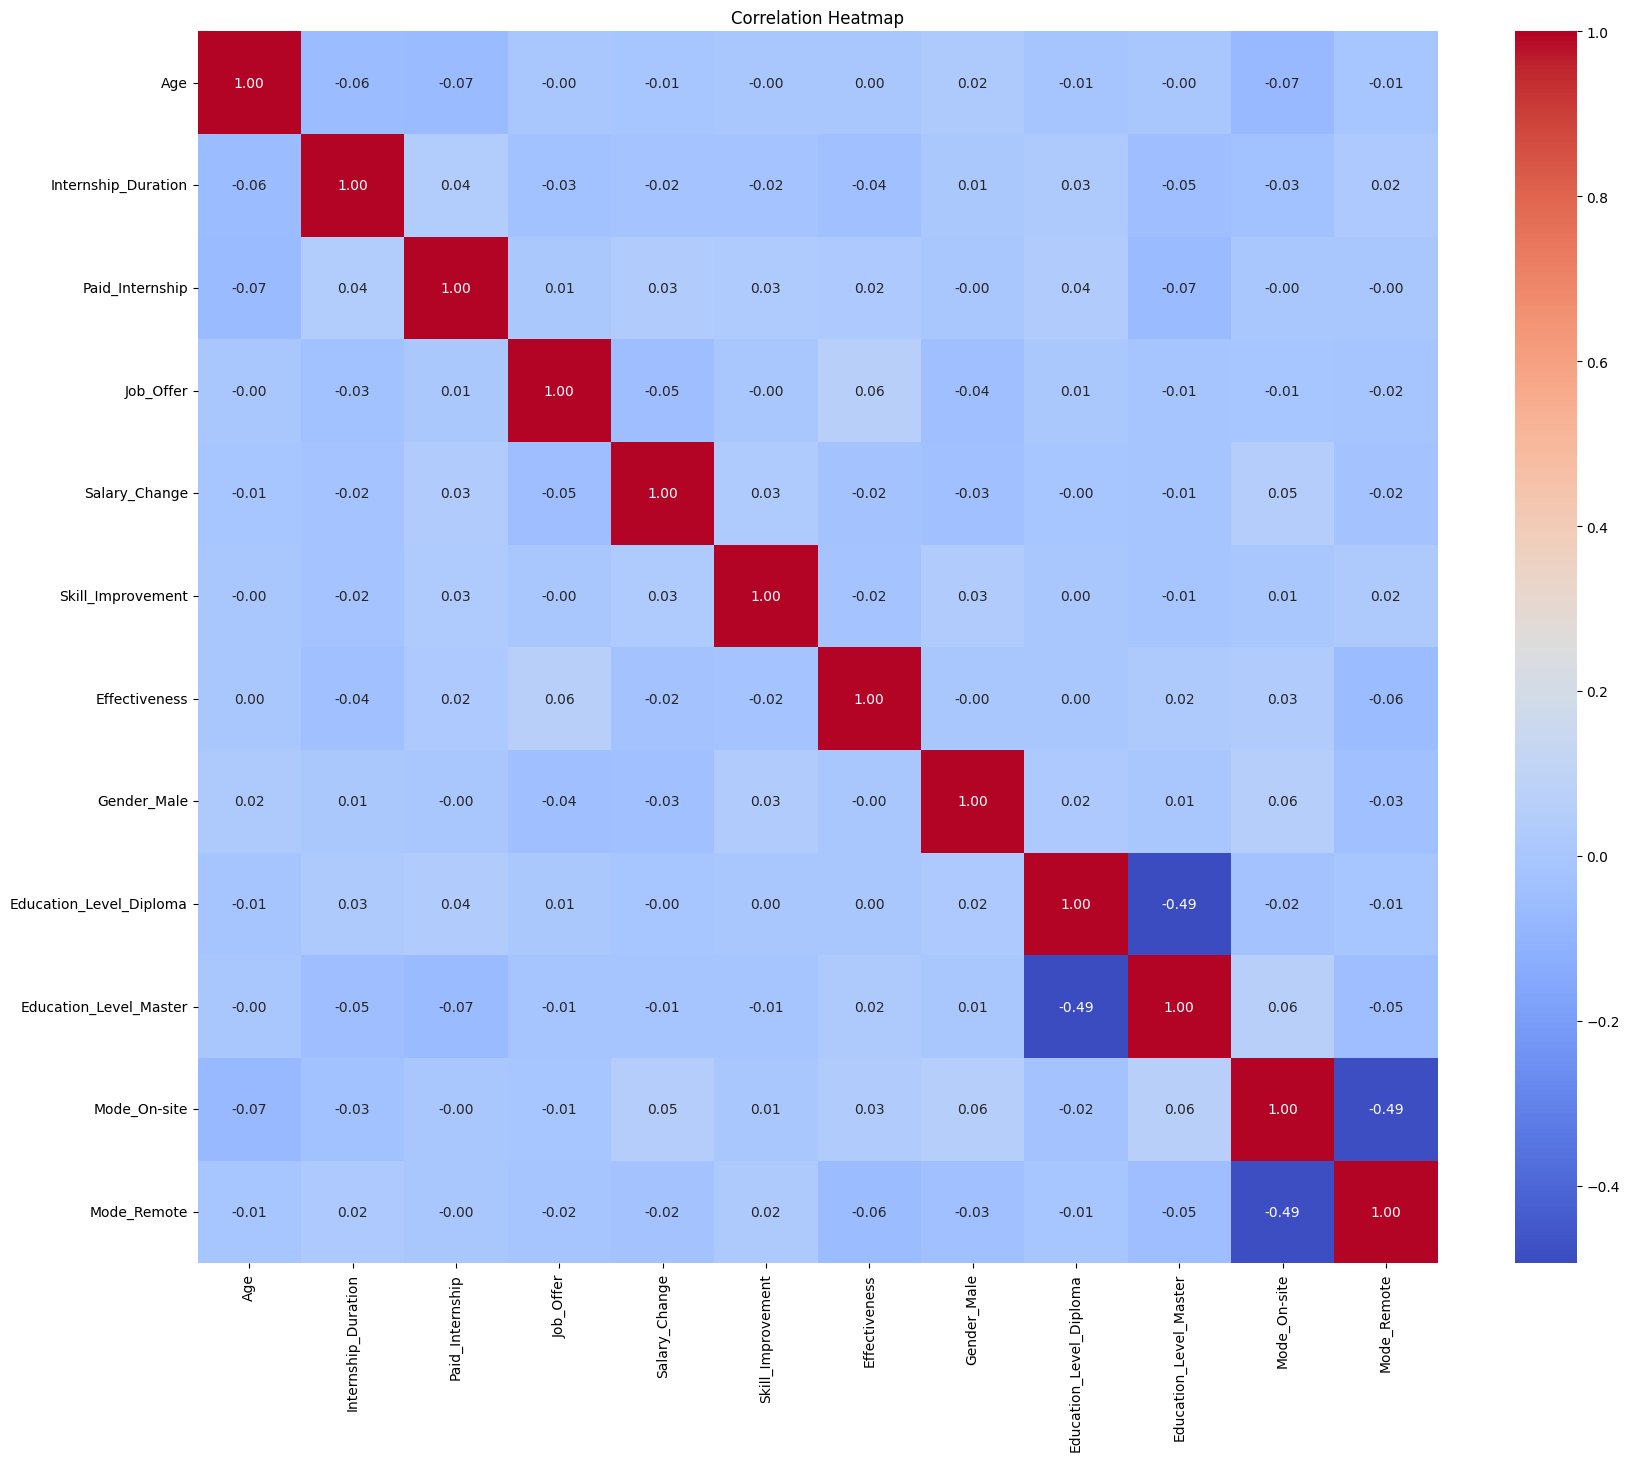

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

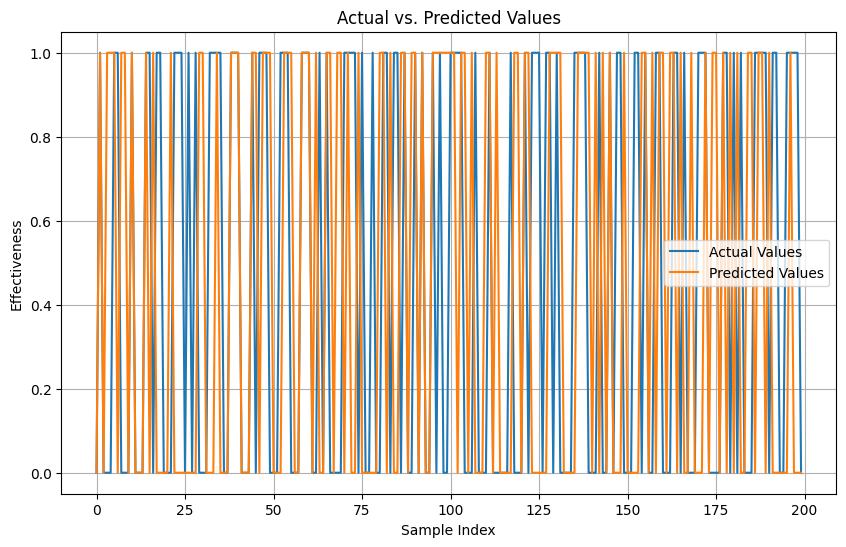

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Effectiveness')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")

Accuracy: 0.565

Confusion Matrix:
[[55 51]
 [36 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       106
           1       0.53      0.62      0.57        94

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.57      0.56      0.56       200



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from google.colab import drive


X = df.drop(['Effectiveness'], axis=1)
y = df['Effectiveness']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Loaded Successfully!
   Age  Gender Education_Level  Internship_Duration  Paid_Internship     Mode  \
0   26    Male          Master                   10                0  On-site   
1   23    Male          Master                    2                1  On-site   
2   27  Female         Diploma                    3                0   Hybrid   
3   24  Female          Master                   11                1   Remote   
4   26    Male          Master                    1                1   Hybrid   

   Job_Offer  Salary_Change  Skill_Improvement  Effectiveness  
0          1            -72                  4              0  
1          1           1185                  5              0  
2          1            -85                  4              0  
3          1            976                  1              0  
4          0            226        

<ipython-input-23-d63d7b38ddbf>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Accuracy: 0.555
F1 Score: 0.5340314136125655

Confusion Matrix:
[[60 46]
 [43 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       106
           1       0.53      0.54      0.53        94

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.56      0.56      0.56       200



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


X = df.drop(['Effectiveness'], axis=1)
y = df['Effectiveness']

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "SVM (Linear Kernel)": SVC(kernel='linear', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "f1_score": f1}

for name, metrics in results.items():
  print(f"{name}:")
  print(f"  Accuracy: {metrics['accuracy']:.4f}")
  print(f"  F1 Score: {metrics['f1_score']:.4f}")
  print("-" * 20)

best_model = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest Model based on Accuracy: {best_model}")

Random Forest:
  Accuracy: 0.5000
  F1 Score: 0.4624
--------------------
Gaussian Naive Bayes:
  Accuracy: 0.5650
  F1 Score: 0.5714
--------------------
SVM (Linear Kernel):
  Accuracy: 0.5550
  F1 Score: 0.5340
--------------------

Best Model based on Accuracy: Gaussian Naive Bayes


In [ ]:


from imblearn.over_sampling import SMOTE


X = df.drop(['Effectiveness'], axis=1)
y = df['Effectiveness']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = model.predict(X_test_resampled)

print(classification_report(y_test_resampled, y_pred_resampled))

Original class distribution: Effectiveness
0    501
1    499
Name: count, dtype: int64
Resampled class distribution: Effectiveness
0    501
1    501
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       100
           1       0.52      0.48      0.49       101

    accuracy                           0.51       201
   macro avg       0.51      0.51      0.51       201
weighted avg       0.51      0.51      0.51       201



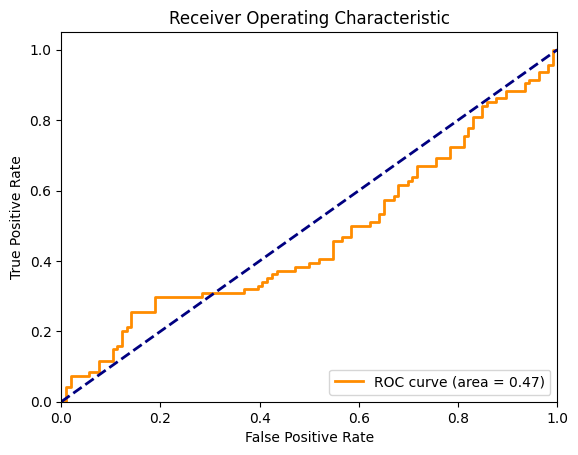

In [ ]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


model = SVC(kernel='linear', random_state=42, probability=True)
model.fit(X_train, y_train)


y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:


for name, metrics in results.items():
  print(f"{name}:")
  print(f"  Accuracy: {metrics['accuracy']:.4f}")
  print(f"  F1 Score: {metrics['f1_score']:.4f}")
  print("-" * 20)

Random Forest:
  Accuracy: 0.5000
  F1 Score: 0.4624
--------------------
Gaussian Naive Bayes:
  Accuracy: 0.5650
  F1 Score: 0.5714
--------------------
SVM (Linear Kernel):
  Accuracy: 0.5550
  F1 Score: 0.5340
--------------------


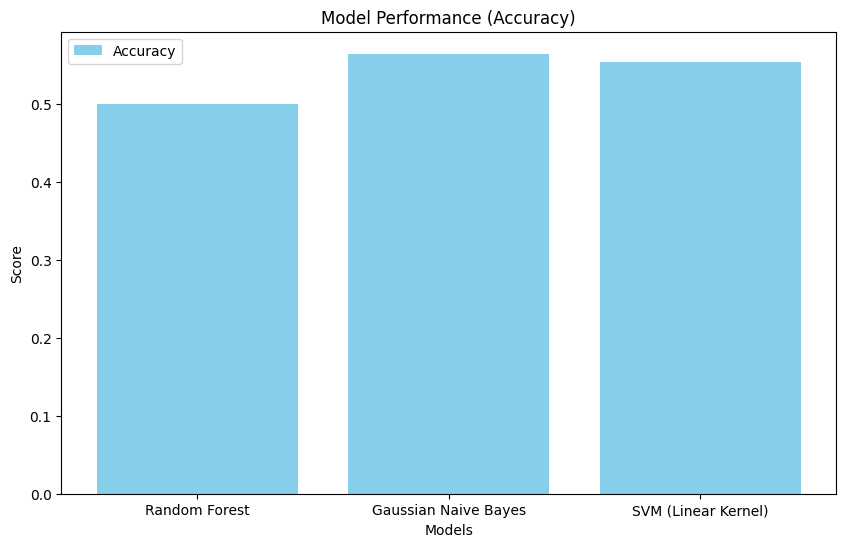

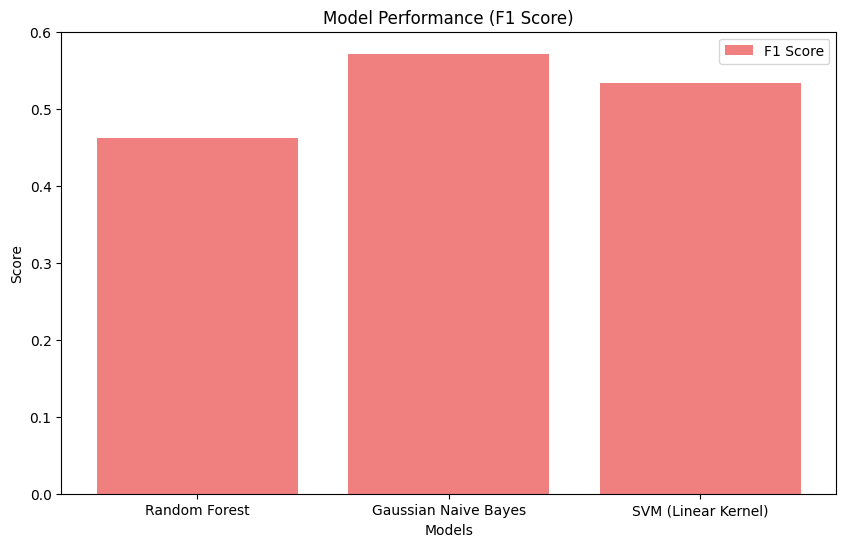

In [ ]:


import matplotlib.pyplot as plt



model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
f1_scores = [results[model]['f1_score'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue', label='Accuracy')
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance (Accuracy)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color='lightcoral', label='F1 Score')
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance (F1 Score)")
plt.legend()
plt.show()

In [ ]:


import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Model:")
print("Accuracy:", accuracy_xgb)
print("F1 Score:", f1_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model:
Accuracy: 0.465
F1 Score: 0.44559585492227977

Confusion Matrix:
[[50 56]
 [51 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48       106
           1       0.43      0.46      0.45        94

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.47      0.47      0.47       200



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:31:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
